In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import glob
from PIL import Image
import pandas as pd

In [2]:
def show_sample(x):
    x_img=x.reshape((64,64,3))
    plt.imshow(x_img)
    plt.show()    

In [3]:
train=pd.read_csv("/home/nishant.puri2577/train_pt2.csv")

In [4]:
train=train.values
print train.shape
train=train.astype(np.uint8)

(20000, 12288)


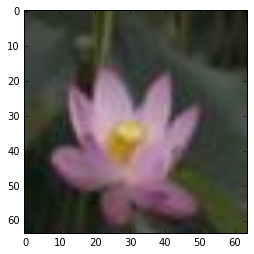

In [5]:
show_sample(train[12])

In [6]:
train=train/256.

In [7]:
image_list = []
for filename in glob.glob('/home/nishant.puri2577/gitstuff/image-completion-using-GANs/splitimages/*'): #assuming gif
    im=misc.imread(filename)
    image_list.append(im)
test=image_list[0].reshape(12288)
for i in range(1,len(image_list)):
    test=np.vstack((test,image_list[i].reshape(12288)))

(256, 12288)


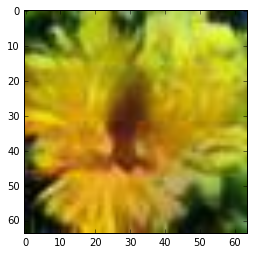

In [10]:
print test.shape
show_sample(test[0])

In [9]:
test=test/256.

In [11]:
cnt_test=test.shape[0]
cnt_train=train.shape[0]

In [12]:
cnt_test
cnt_train

20000

In [13]:
train_sq_sum=np.sum(train*train,axis=1)
train_sq=np.repeat(train_sq_sum.reshape((1,train_sq_sum.shape[0])),cnt_test,axis=0)

In [14]:
test_sq_sum=np.sum(test*test,axis=1)
test_sq=np.repeat(test_sq_sum.reshape((test_sq_sum.shape[0],1)),cnt_train,axis=1)

In [15]:
c=train_sq+test_sq-2*test.dot(train.T)

In [16]:
closest_image_idx=np.argmin(c,1)
min_dist=np.min(c,1)

In [17]:
min_dist[1]

845.5498046875

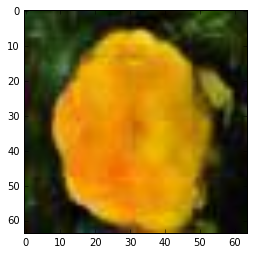

In [28]:
#index
i=21
image=(test[i]*256).astype(np.uint8)
show_sample(image)

18.4206209152


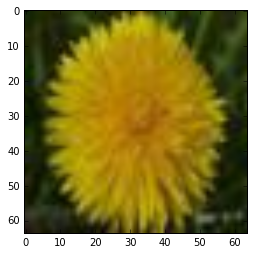

In [30]:
image_nn=train[closest_image_idx[i],:]
print np.sqrt(min_dist[i])
show_sample((image_nn*256).astype(np.uint8))